In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd
import numpy as np
import cartopy.geodesic as cargeo
from shapely.geometry import Polygon
import matplotlib.ticker as mticker

In [9]:
# Read files .xls (Lat-Lon gauges)
data = pd.read_excel(pd.ExcelFile("C:/Users/Admin/OneDrive/Desktop/gauges2.xlsx"),sheet_name='2')
df =data
df=df[['STT','Tên Trạm','Latitude','Longitude']]

In [10]:
# Draw Range Rings
circle_points_50km= cargeo.Geodesic().circle(lon=103.51694002747536,lat=21.571390070021152, radius=50000, n_samples=180, endpoint=False)
circle_points_100km= cargeo.Geodesic().circle(lon=103.51694002747536,lat=21.571390070021152, radius=100000, n_samples=180, endpoint=False)
circle_points_200km= cargeo.Geodesic().circle(lon=103.51694002747536,lat=21.571390070021152, radius=200000, n_samples=180, endpoint=False)
geom_50km=Polygon(circle_points_50km)
geom_100km=Polygon(circle_points_100km)
geom_200km=Polygon(circle_points_200km)

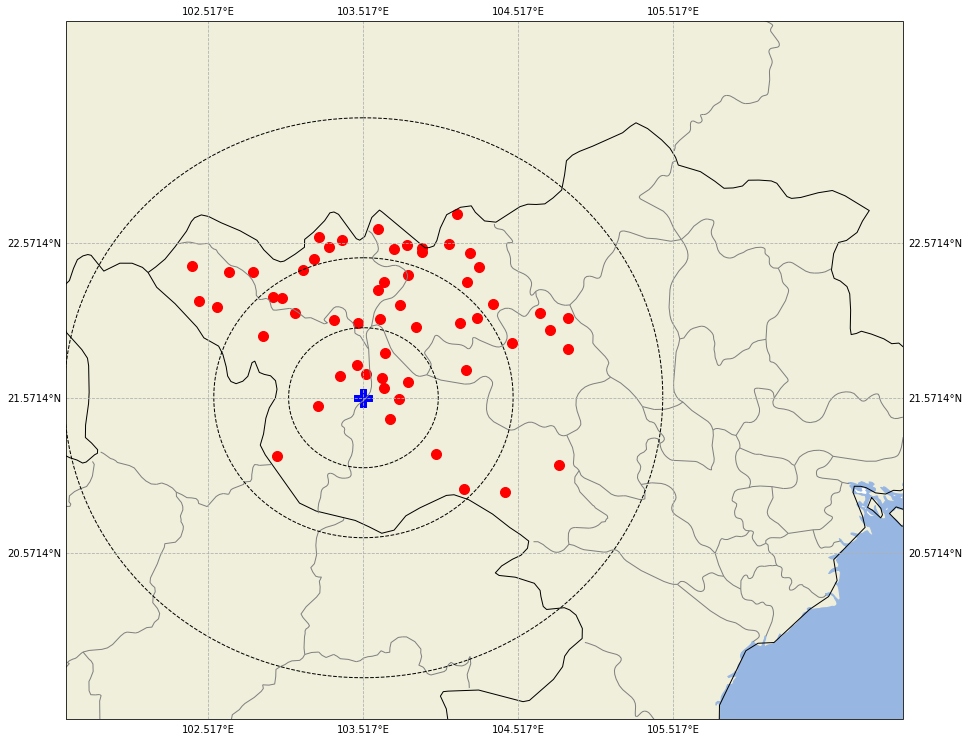

In [11]:
fig=plt.figure(figsize=(15,18))
ax=fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN.with_scale('10m'))
ax.add_feature(cfeat.COASTLINE.with_scale('50m'))
ax.add_feature(cfeat.BORDERS.with_scale('50m'))
state_provinces_lines=cfeat.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='10m',facecolor='none')
ax.add_feature(state_provinces_lines,edgecolor='gray')
#ax.gridlines(draw_labels=True,linestyle='--')
g1=ax.gridlines(draw_labels=True,linestyle='--')
#g1.xlabels_top = False
#g1.ylabels_left = False
g1.xlocator = mticker.FixedLocator([102.51694002747536, 103.51694002747536, 104.51694002747536, 105.51694002747536])
g1.ylocator = mticker.FixedLocator([20.571390070021152,21.571390070021152,22.571390070021152])
ax.set_extent((101.6,107,19.5,24),crs=ccrs.PlateCarree())
ax.scatter(x=df["Longitude"],y=df["Latitude"],transform=ccrs.PlateCarree(), color="red",s=100, alpha=1,marker='o')
ax.scatter(x=103.51694002747536,y=21.571390070021152,transform=ccrs.PlateCarree(), color="blue",s=300, alpha=1,marker='P')
ax.add_geometries((geom_50km,), crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1, linestyle='--')
ax.add_geometries((geom_100km,), crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1, linestyle='--')
ax.add_geometries((geom_200km,), crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1, linestyle='--');